In [14]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
# Load dataset
file_path = "C:/Users/91749/Downloads/Goa University Dissertation (1).xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse("Onsite Form Responses ")

In [16]:
# Strip column names
df.columns = df.columns.str.strip()

# List of columns to clean
cols_to_clean = [
    'State/Country',
    'Gender:',
    'Are you camping at the Basilica?',
    'Age groups',
    'Type of visitors',
    'walking pilgrim'
]

# Apply strip and lower to each column in the list
for col in cols_to_clean:
    df[col] = df[col].apply(lambda x: str(x).strip().lower())
print(df.columns)

Index(['Timestamp', 'Your Age', 'Gender:',
       'State of Residence in India/ Country', 'Event Attending',
       'How many years (approx) have you been visiting the Basilica?',
       'Are you camping at the Basilica?',
       'I agree to have my information used only for research purposes.',
       'walking pilgrim', 'State/Country', 'Region', 'Age groups',
       'No of times visited', 'Type of visitors', 'Country', 'Column 1'],
      dtype='object')


In [17]:
#Rename Columns
df.rename(columns={
    'Are you camping at the Basilica?': 'camping',
    'Type of visitors': 'Visitor frequency',
    'Event Attending': 'Event',
    'Gender:': 'Gender'
}, inplace=True)


In [18]:
print(df.columns)

Index(['Timestamp', 'Your Age', 'Gender',
       'State of Residence in India/ Country', 'Event',
       'How many years (approx) have you been visiting the Basilica?',
       'camping',
       'I agree to have my information used only for research purposes.',
       'walking pilgrim', 'State/Country', 'Region', 'Age groups',
       'No of times visited', 'Visitor frequency', 'Country', 'Column 1'],
      dtype='object')


In [19]:
# Extract useful components of date
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday  # 0 = Monday, 6 = Sunday
df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
df['Is_Feast_Day'] = df['Timestamp'].isin(['2024-12-03']).astype(int)  # Add your feast dates

In [20]:
#Checks if value is missing, split the string on commas and makes into list of items, and tims whitespace for each item in list

df['Event'] = df['Event'].apply(lambda x: [i.strip() for i in x.split(',')] if pd.notna(x) else [])
print(df['Event'].head(5)) 

0                         [Veneration of Relics, Mass]
1                [Fair / Cultural Event / Sightseeing]
2    [Veneration of Relics, Mass, Fair / Cultural E...
3    [Veneration of Relics, Mass, Fair / Cultural E...
4    [Veneration of Relics, Mass, Fair / Cultural E...
Name: Event, dtype: object


In [21]:
# Create new columns for each event
df['Veneration_of_Relics'] = df['Event'].apply(lambda x: 1 if 'Veneration of Relics' in x else 0)
df['Mass'] = df['Event'].apply(lambda x: 1 if 'Mass' in x else 0)
df['Fair/Cultural_Event/Sightseeing'] = df['Event'].apply(lambda x: 1 if 'Fair / Cultural Event / Sightseeing' in x else 0)
df['Walking_pilgrimage'] = df['Event'].apply(lambda x: 1 if 'Walking pilgrimage' in x else 0)



In [22]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
cols_to_encode = [
    'Gender',
    'State/Country',
    'camping',
    'Age groups',
    'Visitor frequency',
    'walking pilgrim'
]

# Dictionary to store encoders
encoders = {}

# Apply LabelEncoder to each column
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Save encoder in case you need to inverse transform later


In [23]:
print(df.head(5))

   Timestamp  Your Age  Gender State of Residence in India/ Country  \
0 2024-11-24        68       0                                  Goa   
1 2024-11-24        17       0                           Chandigarh   
2 2024-11-24        40       0                           Tamil Nadu   
3 2024-11-24        42       1                           Tamil Nadu   
4 2024-11-24        75       1                          Tamil Nadu    

                                               Event  \
0                       [Veneration of Relics, Mass]   
1              [Fair / Cultural Event / Sightseeing]   
2  [Veneration of Relics, Mass, Fair / Cultural E...   
3  [Veneration of Relics, Mass, Fair / Cultural E...   
4  [Veneration of Relics, Mass, Fair / Cultural E...   

  How many years (approx) have you been visiting the Basilica?  camping  \
0                                  Its my first time                  1   
1                                  Its my first time                  0   
2          

In [24]:
# Replace "It's my first time" with 1 in Visit_Count column
df["No of times visited"] = df["No of times visited"].replace("Its my first time", 1)

In [25]:
# Define features and labels
X = df[['Age groups', 'Gender', 'State/Country', 'Visitor frequency', 'camping', 'Weekend', 'Is_Feast_Day']]
y = df[['Fair/Cultural_Event/Sightseeing','Veneration_of_Relics', 'Mass']]

In [26]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


--- Gradient Boosting Classifier ---


c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

Fair/Cultural_Event/Sightseeing       0.71      0.86      0.78       369
           Veneration_of_Relics       0.79      0.93      0.85       472
                           Mass       0.77      0.70      0.73       316

                      micro avg       0.76      0.84      0.80      1157
                      macro avg       0.76      0.83      0.79      1157
                   weighted avg       0.76      0.84      0.80      1157
                    samples avg       0.75      0.84      0.77      1157

Accuracy Score: 0.49846153846153846
Hamming Loss: 0.2523076923076923
Jaccard Score (macro): 0.6528734861841702
AUC-ROC Score (macro): 0.7920579927977135


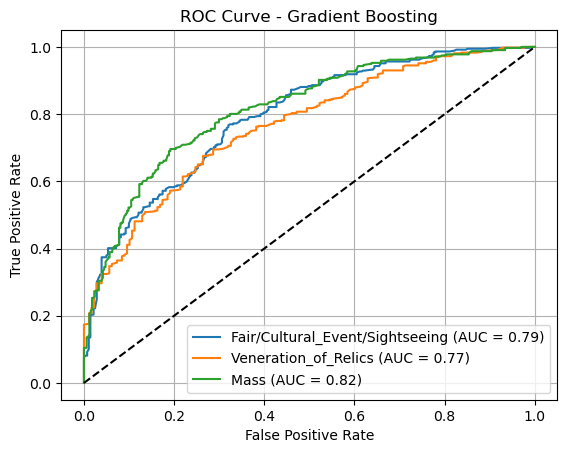

In [27]:

from sklearn.metrics import classification_report, accuracy_score, hamming_loss, jaccard_score, roc_auc_score, roc_curve, auc

from sklearn.multioutput import MultiOutputClassifier


# Function to plot ROC Curve for multi-label
def plot_multilabel_roc(y_test, y_score, title, class_names):
    n_classes = y_test.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# List of models
models = {

    "Gradient Boosting": MultiOutputClassifier(GradientBoostingClassifier())
}

# Evaluate each model
for name, model in models.items():
    print(f"\n--- {name} Classifier ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Try-except for predict_proba
    try:
        y_score = model.predict_proba(X_test)
        y_score = np.array([prob[:, 1] for prob in y_score]).T
        supports_proba = True
    except AttributeError:
        y_score = y_pred
        supports_proba = False

    print(classification_report(y_test, y_pred, target_names=y.columns))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print("Jaccard Score (macro):", jaccard_score(y_test, y_pred, average='macro'))

    if supports_proba:
        print("AUC-ROC Score (macro):", roc_auc_score(y_test, y_score, average='macro'))
        plot_multilabel_roc(y_test, y_score, name, y.columns)


In [28]:
import joblib
joblib.dump(model, 'gradient_boost_model.joblib')

print("Model saved successfully!")

Model saved successfully!


In [29]:
import os

# Save all encoders in the 'encoders' folder
os.makedirs('encoders', exist_ok=True)  # Create directory if it doesn't exist

for col, encoder in encoders.items():
    filename = f'encoders/le_{col.replace("/", "_").replace(" ", "_")}.joblib'
    joblib.dump(encoder, filename)

print("All encoders saved successfully!")


All encoders saved successfully!


In [30]:
# Step 4: Load the model from the saved file
loaded_model = joblib.load('gradient_boost_model.joblib')

# Predict with the loaded model (using the same test set as an example)
y_pred_loaded = loaded_model.predict(X_test)



In [31]:
import pandas as pd

# Example new input for a first-time visitor
new_data = pd.DataFrame([{

    'Age groups':4, 
    'Gender':1, 
    'State/Country':1, 
    'Visitor frequency':2, 
    'camping':1, 
    'Weekend':1, 
    'Is_Feast_Day':1
}])

# Predict event(s) the visitor is likely to attend
predicted_event = loaded_model.predict(new_data)

# If it's multioutput, this will return a 2D array (e.g., [[1, 0, 1]] for 3 events)
print("Predicted Event(s):", predicted_event)




Predicted Event(s): [[0 1 1]]


In [32]:
# Example: event label order used during training
event_labels = ['Fair/Cultural Event/Sightseeing', 'Veneration of Relics', 'Mass']

# Get predicted events (True = 1)
predicted_events_list = [event for event, val in zip(event_labels, predicted_event[0]) if val == 1]
print("Predicted Events:", predicted_events_list)

Predicted Events: ['Veneration of Relics', 'Mass']


In [33]:
# Decode the label-encoded categories to show original text values
valid_choices = {
    col: encoder.inverse_transform(sorted(df[col].unique()))
    for col, encoder in encoders.items()
}


In [34]:
import joblib
# List of encoded columns (should match what you used originally)
encoded_columns = ['Gender', 'State/Country', 'camping', 'Age groups', 'Visitor frequency']

# Load encoders into a dictionary
encoders = {
    col: joblib.load(f'encoders/le_{col.replace("/", "_").replace(" ", "_")}.joblib')
    for col in encoded_columns
}

In [37]:
def interactive_predict_event(model, encoders, event_labels, valid_choices):
    print("\n🎉 Welcome to the Visitor Event Predictor!")
    print("Please enter values from the valid options shown below.\n")

    raw_input = {}

    # Step 1: Get categorical inputs
    for feature, options in valid_choices.items():
        print(f"{feature} options: {list(options)}")
        while True:
            user_input = input(f"Enter value for '{feature}': ").strip()
            if user_input in options:
                raw_input[feature] = user_input
                break
            else:
                print("❌ Invalid input. Please enter exactly one of the shown options.")

    # Step 2: Get binary inputs
    while True:
        weekend = input("Is it a Weekend? (Yes/No): ").strip().capitalize()
        if weekend in ['Yes', 'No']:
            raw_input['Weekend'] = 1 if weekend == 'Yes' else 0
            break
        else:
            print("❌ Please enter 'Yes' or 'No'.")

    while True:
        feast_day = input("Is it Feast Day? (Yes/No): ").strip().capitalize()
        if feast_day in ['Yes', 'No']:
            raw_input['Is_Feast_Day'] = 1 if feast_day == 'Yes' else 0
            break
        else:
            print("❌ Please enter 'Yes' or 'No'.")

    # Step 3: Encode input
    try:
        encoded_input = {
            'Age groups': encoders['Age groups'].transform([raw_input['Age groups']])[0],
            'Gender': encoders['Gender'].transform([raw_input['Gender']])[0],
            'State/Country': encoders['State/Country'].transform([raw_input['State/Country']])[0],
            'Visitor frequency': encoders['Visitor frequency'].transform([raw_input['Visitor frequency']])[0],
            'camping': encoders['camping'].transform([raw_input['camping']])[0],
            'Weekend': raw_input['Weekend'],
            'Is_Feast_Day': raw_input['Is_Feast_Day']
        }

        input_df = pd.DataFrame([encoded_input])
        y_pred = model.predict(input_df)
        predicted_events = [event_labels[i] for i, val in enumerate(y_pred[0]) if val == 1]

        print("\n✅ Prediction complete!\n🎯 Predicted Events:")
        if predicted_events:
            for event in predicted_events:
                print("•", event)
        else:
            print("No specific event predicted.")

    except Exception as e:
        print("❌ Error during prediction:", str(e))


In [38]:
interactive_predict_event(loaded_model, encoders, event_labels, valid_choices)



🎉 Welcome to the Visitor Event Predictor!
Please enter values from the valid options shown below.

Gender options: ['female', 'male']
State/Country options: ['andhra pradesh', 'arunachal pradesh', 'assam', 'australia', 'belarus', 'bihar', 'chhattisgarh', 'delhi', 'fiji', 'france', 'germany', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'ireland', 'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala', 'khazakistan', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'nagaland', 'nepal', 'netherlands', 'odisha', 'philippines', 'poland', 'portugal', 'punjab', 'rajasthan', 'russia', 'singapore', 'spain', 'switzerland', 'tamil nadu', 'tanzania', 'telangana', 'uk', 'usa', 'uttar pradesh', 'uttarakhand', 'washington dc', 'west bengal', 'zimbabwe']
camping options: ['no', 'yes']
Age groups options: ['early professionals', 'mature adults', 'senior citizen', 'young adults', 'young dependents', 'youth']
Visitor frequency options: ['first time visitors', 'frequent visitors', 'long-time 